In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline

In [2]:
google_data=pd.read_csv("googleplaystore.csv")
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
google_data.shape

(10841, 13)

In [4]:
google_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [5]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

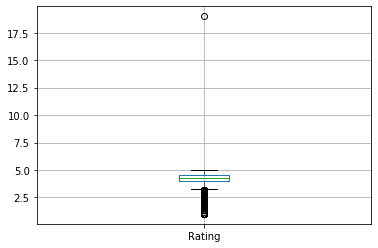

In [6]:
google_data.boxplot('Rating')

In [7]:
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
google_data.drop([10472],inplace=True)

In [9]:
medi_rating=google_data.Rating.median()

In [10]:
def impute_median(abc):
    return abc.fillna(abc.median())

In [11]:
google_data.Rating=google_data['Rating'].transform(impute_median)

In [12]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
print (google_data['Type'].mode().values[0])
print (google_data['Current Ver'].mode().values[0])
print (google_data['Android Ver'].mode().values[0])

Free
Varies with device
4.1 and up


In [16]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [42]:
google_data['Price'].tail(200)

10641       0
10642       0
10643       0
10644       0
10645    8.99
         ... 
10836       0
10837       0
10838       0
10839       0
10840       0
Name: Price, Length: 200, dtype: object

In [21]:
google_data['Price']=google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))

#conver to int
google_data['Price']=google_data["Price"].apply(lambda x: float(x))

#convert rating to int
google_data['Reviews']=pd.to_numeric(google_data['Reviews'], errors='coerce') #coerce is used to ignore if they encountered any error

In [22]:
google_data['Installs'].tail(200)

10641       100,000+
10642       500,000+
10643        10,000+
10644        10,000+
10645       100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 200, dtype: object

In [23]:
#remove + sign from the install

google_data['Installs']=google_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
#now remove comma from installs
google_data['Installs']= google_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))

In [24]:
print(google_data['Installs'].dtype)

object


In [25]:
#as of now install is string , now we convert it into int
google_data['Installs']=google_data['Installs'].apply(lambda x: float(x))

In [26]:
#grop as per category
grp=google_data.groupby('Category')
x= grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.mean)
z= grp['Reviews'].agg(np.mean)

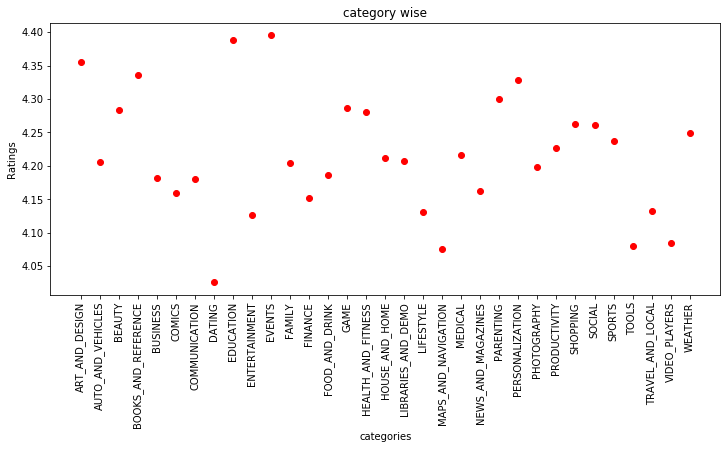

In [27]:
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')  #ro means we need . type graph
plt.xticks(rotation=90)
plt.xlabel("categories")
plt.ylabel("Ratings")
plt.title("category wise")
plt.show()

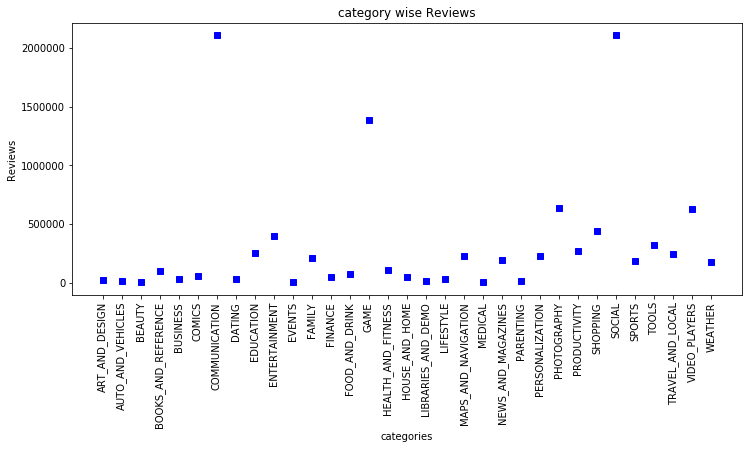

In [28]:
#as per z
plt.figure(figsize=(12,5))
plt.plot(z, 'bs')  
plt.xticks(rotation=90)
plt.xlabel("categories")
plt.ylabel("Reviews")
plt.title("category wise Reviews")
plt.show()